In [1]:
# Imported packages
import pandas as pd # data processing
import numpy as np # linear algebra
from scipy import stats # Statistical operations

In [2]:
#Read the csv file
data = pd.read_csv(r'C:\Users\admin\Downloads\insurance_data\insurance.csv')

In [3]:
#check starting 5 values of the data
data.head()

,#age,gender,bmi,childrens,smoker,regions,charges_
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
# check no. of rows and columns
data.shape

(1338, 7)

In [5]:
# check columns
data.columns = data.columns.str.lower()

In [6]:
data.columns

Index(['#age', 'gender', 'bmi', 'childrens', 'smoker', 'regions', 'charges_'], dtype='object')

In [7]:
#Rename the columns
data = data.rename(columns = {'#age':'age','charges_':'charges'})

In [8]:
#Check the renamed columns
data.head()

,age,gender,bmi,childrens,smoker,regions,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [9]:
# check row count of rows.
print("the row count of dataset {}".format(data.shape[0]))

the row count of dataset 1338


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        1338 non-null   int64  
 1   gender     1338 non-null   object 
 2   bmi        1338 non-null   float64
 3   childrens  1338 non-null   int64  
 4   smoker     1338 non-null   object 
 5   regions    1338 non-null   object 
 6   charges    1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [11]:
# Check if data has null values
data.isna().sum()

age          0
gender       0
bmi          0
childrens    0
smoker       0
regions      0
charges      0
dtype: int64

In [12]:
# Describe your data into five point summary
data.describe()

,age,bmi,childrens,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [13]:
# check if values have duplicated values.
data.duplicated().sum()

1

In [14]:
# drop duplictaed values.
data.drop_duplicates(inplace=True)

In [15]:
# check again if the duplicated values got dropped.
data.duplicated().sum()

0

In [16]:
# Import packages for visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
# Check value counts for the column gender

data.value_counts('gender')

gender
male      675
female    662
dtype: int64

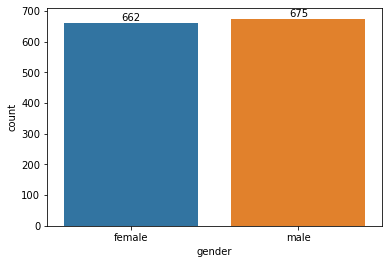

In [18]:
# Distribution of Females and Males in the dataset

ax = sns.countplot(data=data,x = 'gender')
# Add value labels
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.show()



In [19]:
# Check value counts for the column smoker
data.value_counts('smoker')

smoker
no     1063
yes     274
dtype: int64

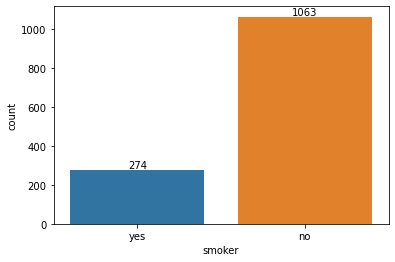

In [20]:
# Distribution of smokers and non-smokers
ax = sns.countplot(data=data,x = 'smoker')
# Add value labels
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.show()

In [21]:
# Check value counts for the column regions
data.value_counts('regions')

regions
southeast    364
southwest    325
northeast    324
northwest    324
dtype: int64

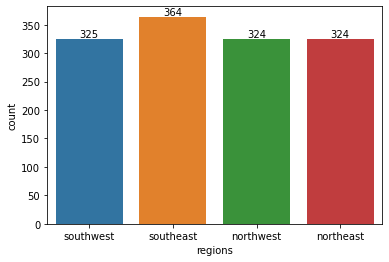

In [22]:
#Distribution of Regions
ax = sns.countplot(data=data,x = 'regions')
# Add value labels
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.show()

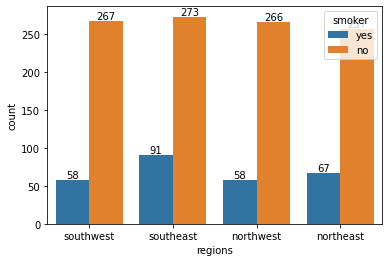

In [23]:
# Distribution of smokers by regions
ax = sns.countplot(x = 'regions', hue = 'smoker',data = data)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.show()

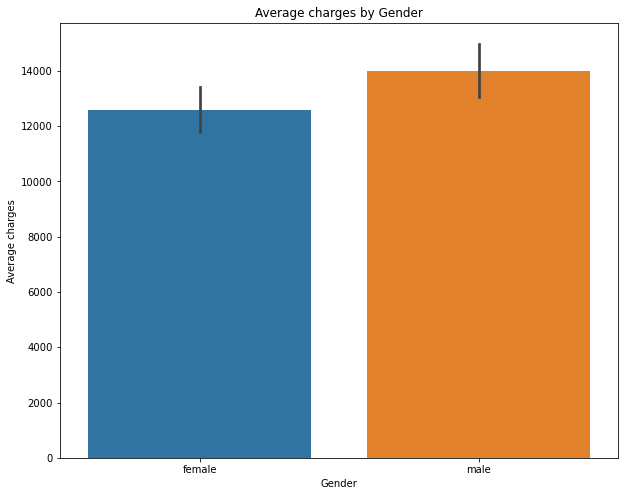

In [24]:
plt.figure(figsize=(10,8))
sns.barplot( x = 'gender', y = 'charges', data = data)
plt.title('Average charges by Gender')
plt.xlabel('Gender')
plt.ylabel('Average charges')
plt.show()

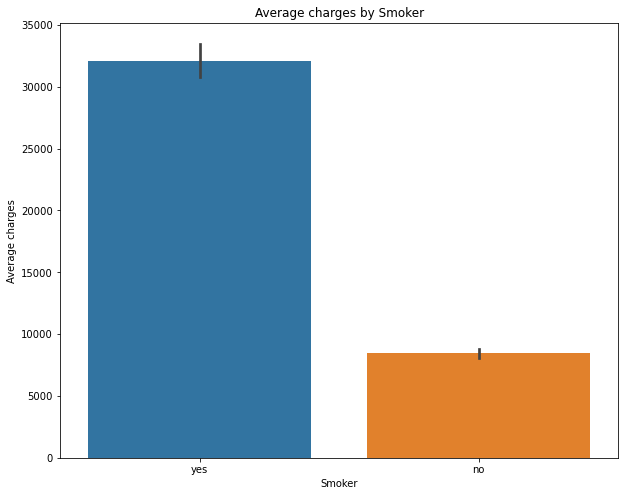

In [25]:
plt.figure(figsize=(10,8))
sns.barplot( x = 'smoker', y = 'charges', data = data)
plt.title('Average charges by Smoker')
plt.xlabel('Smoker')
plt.ylabel('Average charges')
plt.show()

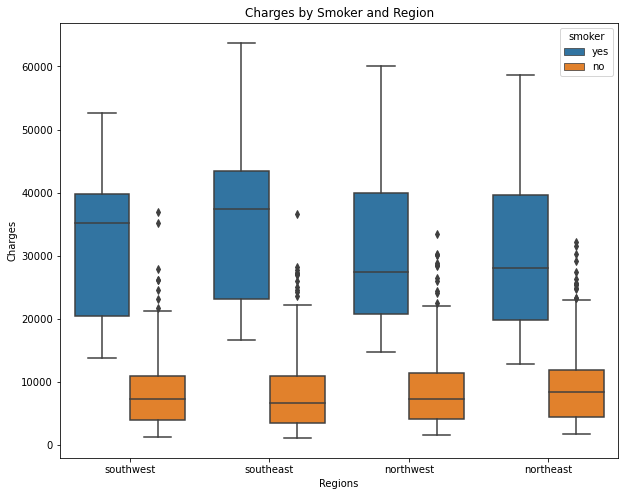

In [26]:
plt.figure(figsize=(10,8))
sns.boxplot( x = 'regions', y = 'charges',hue = 'smoker', data = data)
plt.title('Charges by Smoker and Region')
plt.xlabel('Regions')
plt.ylabel('Charges')
plt.show()

# Preprocess data by using sklearn library(transforming categorical variable into numerical variable)

In [27]:
from sklearn import preprocessing

In [28]:
labelencoder = preprocessing.LabelEncoder()

In [29]:
# Label Encoding Categorical Variables 
data['gender'] = labelencoder.fit_transform(data['gender'])
data['smoker'] = labelencoder.fit_transform(data['smoker'])
data['regions'] = labelencoder.fit_transform(data['regions'])

In [30]:
data.head()

,age,gender,bmi,childrens,smoker,regions,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [31]:
#lets get the correlation coefficients between the columns.

data.corr()['charges'].sort_values(ascending = False)

#correlation between the two cols are closer to one, it means + strong relationship,
# if its closer to minus 1 then its - strong relationship

charges      1.000000
smoker       0.787234
age          0.298308
bmi          0.198401
childrens    0.067389
gender       0.058044
regions     -0.006547
Name: charges, dtype: float64

In [32]:
# Plotting heatmap to check the correlation

<AxesSubplot:>

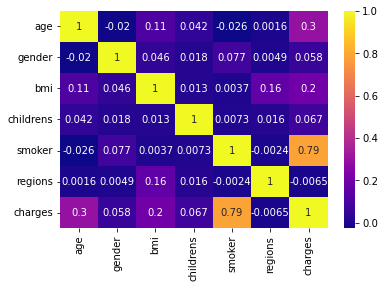

In [33]:
sns.heatmap(data.corr(),annot = True, cmap = 'plasma')

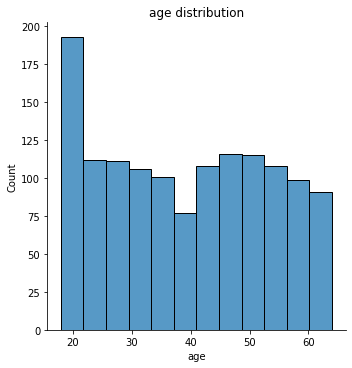

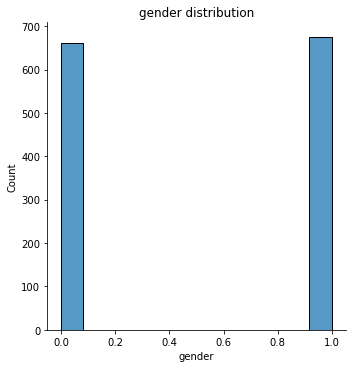

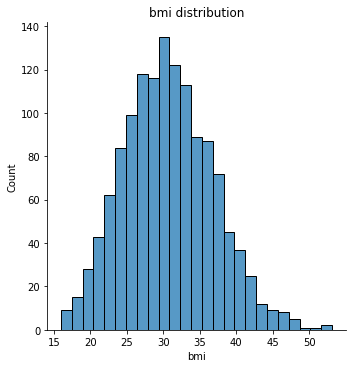

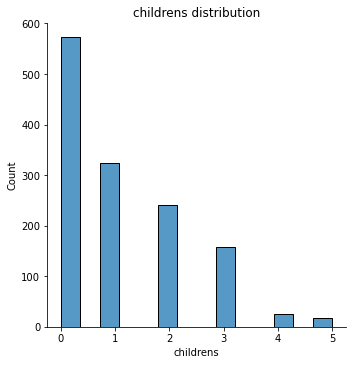

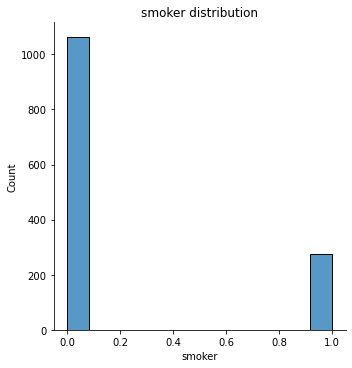

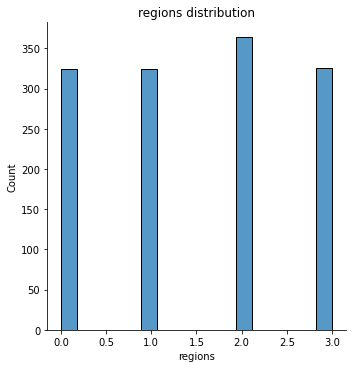

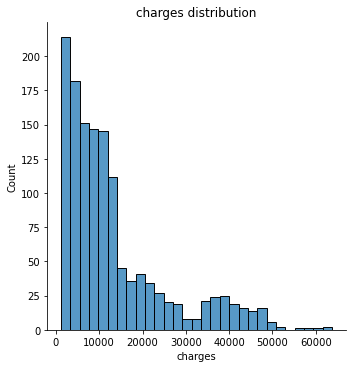

In [34]:
# Distributions for Each Column in the dataset
for i in data.columns:
    sns.displot(data[i])
    plt.title(i + " "+"distribution")
    plt.show()    
    
#BMI values have normal distribution

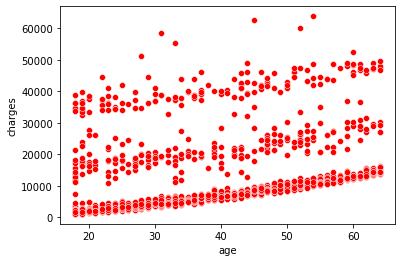

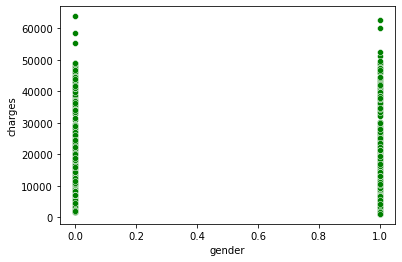

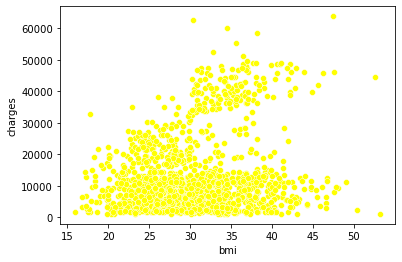

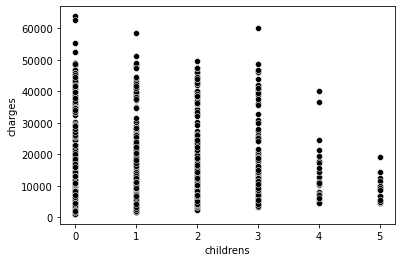

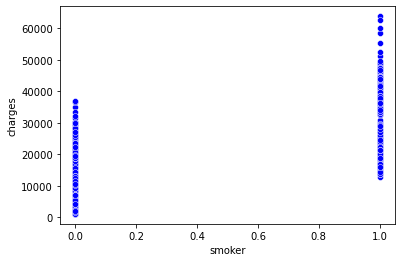

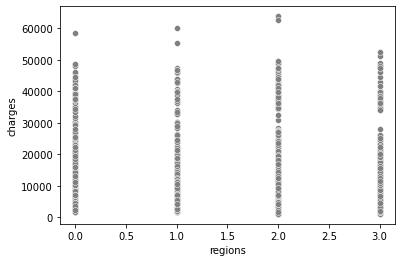

In [35]:
# Check the relationship between features and charges by using scatterplot
colorsforx = ['Red','Green','Yellow','Black','Blue','Grey']
colorchanger = 0

for i in data.columns[:-1]:
    sns.scatterplot(data = data, x = i , y = 'charges', color = colorsforx[colorchanger])
    plt.show()
    colorchanger +=1



# Applying Machine Learning 

In [36]:
from sklearn.model_selection import train_test_split
x = data.drop('charges', axis = 1)
y = data['charges']

In [37]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30)

In [38]:
# Standardizing Feature Data using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_x_train = scaler.fit_transform(x_train)
scaled_x_test = scaler.fit_transform(x_test)


In [39]:
# Calculating Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE)
from sklearn.metrics import mean_absolute_error, mean_squared_error
def modelresults(predictions):
    print(f"Mean absolute error on model is : {mean_absolute_error(y_test,predictions)}")
    print(f"Root mean squared error on model is : {mean_squared_error(y_test,predictions)}")

In [40]:
# Training a Linear Regression Model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(scaled_x_train,y_train)

LinearRegression()

In [41]:
lineal_regression = model.predict(scaled_x_test)
modelresults(lineal_regression)

Mean absolute error on model is : 4360.027041385637
Root mean squared error on model is : 38810130.705758244


In [42]:
# Hyperparameter Tuning for SVR Model using GridSearchCV

from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

# Defining the parameter grid for GridSearchCV
param_gridsvr = {
    'C': [0.001, 0.01, 0.1, 0.5, 1],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto'],
    'degree': [2, 3, 4, 5]
}

# Creating an SVR model
svr_model = SVR()

# Creating a GridSearchCV object with the SVR model and parameter grid
gridsvr = GridSearchCV(svr_model, param_gridsvr, cv=5)

# Fitting the GridSearchCV to the training data
gridsvr.fit(scaled_x_train, y_train)

print(f"Best parameters for the model are: {gridsvr.best_params_}")

Best parameters for the model are: {'C': 1, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}


In [43]:
pred_gridsvr = gridsvr.predict(scaled_x_test)
modelresults(pred_gridsvr)

Mean absolute error on model is : 8127.147278627316
Root mean squared error on model is : 157807275.88969868


In [44]:
# Hyperparameter Tuning for RandomForestRegressor using GridSearchCV

from sklearn.ensemble import RandomForestRegressor

rfrmodel = RandomForestRegressor()

param_gridfr = {
    'bootstrap':[True],
    'max_depth':[5,10,15],
    'max_features':['auto','log2'],
    'n_estimators':[2,3,4,5,6,7,8,9,10]
}

gridrfr = GridSearchCV(rfrmodel, param_gridfr)

gridrfr.fit(scaled_x_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True], 'max_depth': [5, 10, 15],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [45]:
predsgridrfr = gridrfr.predict(scaled_x_test)
modelresults(predsgridrfr)

Mean absolute error on model is : 2581.149139632947
Root mean squared error on model is : 22698504.20353577


In [46]:
x.columns

Index(['age', 'gender', 'bmi', 'childrens', 'smoker', 'regions'], dtype='object')

In [47]:
# Calculate the mean for each column

col_iterate = 1

for index in x.columns:
    mean = data[index].mean()
    print(f" The mean of the column {col_iterate} is {mean}")
    col_iterate += 1
          

 The mean of the column 1 is 39.222139117427076
 The mean of the column 2 is 0.5048616305160808
 The mean of the column 3 is 30.663451757666405
 The mean of the column 4 is 1.0957367240089753
 The mean of the column 5 is 0.2049364248317128
 The mean of the column 6 is 1.5160807778608825


In [48]:
# Predicting Charges for a New Customer

In [49]:
new_customer = np.array([39,0,30,1,0,1])

In [50]:
gridrfr.predict(new_customer.reshape(1,-1))

array([19705.45018716])

In [51]:
print(f"The insurance cost of new cutomer is {gridrfr.predict(new_customer.reshape(1,-1))}")

The insurance cost of new cutomer is [19705.45018716]
